In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns

In [343]:
mergPath='merged_data.xlsx'
mergDat=pd.read_excel(mergPath)        

In [344]:
#drop rows with missing data
mergDat.drop(mergDat[mergDat['Incidence_Rate'] == '__'].index, inplace = True)
mergDat.drop(mergDat[mergDat['Incidence_Rate'] == '_'].index, inplace = True)
#remove characters at end of data and replace * with 0
mergDat['Incidence_Rate'] = mergDat['Incidence_Rate'].astype(str).str.rstrip('#')
mergDat['Incidence_Rate']=mergDat['Incidence_Rate'].apply(lambda x: 0 if x =='*' else float(x))
mergDat['Mortality_Rate'] = mergDat['Mortality_Rate'].astype(str).str.rstrip('#')
mergDat['Mortality_Rate']=mergDat['Mortality_Rate'].apply(lambda x: 0 if x =='*' else float(x))

#drop unused columns
mergDat.drop(['FIPS', 'fips_x','fips_y','Avg_Ann_Incidence','recent_trend','AreaName','Avg_Ann_Deaths','M_With','M_Without','F_With','F_Without','M_Poverty','F_Poverty'], axis=1,inplace=True)
mergDat.drop(['Med_Income_White', 'Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic'], axis=1,inplace=True)

#add row with fraction of insured people and poor people in region
mergDat['Insurance_Frac']=mergDat['All_With']/(mergDat['All_With']+mergDat['All_Without'])
mergDat['Pov_Frac']=mergDat['All_Poverty']/(mergDat['All_With']+mergDat['All_Without'])

#replace missing medians with mean of column
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
mergDat.Med_Income = imp_mean.fit_transform(mergDat['Med_Income'].values.reshape(-1,1))[:,0]


In [345]:
mergDat

,Unnamed: 0,State,All_Poverty,Med_Income,All_With,All_Without,Incidence_Rate,Mortality_Rate,Insurance_Frac,Pov_Frac
0,0,AK,553,61518.0,1442,1857,0.0,0.0,0.437102,0.167627
1,1,AK,499,84306.0,4177,1333,0.0,0.0,0.758076,0.090563
2,2,AK,23914,78326.0,243173,44638,61.5,47.3,0.844905,0.083089
3,3,AK,4364,51012.0,13023,4482,62.7,58.3,0.743959,0.249300
4,4,AK,69,79750.0,768,191,0.0,0.0,0.800834,0.071950
...,...,...,...,...,...,...,...,...,...,...
3129,3129,WY,5058,69022.0,38491,6001,39.9,28.4,0.865122,0.113683
3130,3130,WY,1638,75325.0,18503,3750,23.7,29.1,0.831483,0.073608
3131,3131,WY,2845,56569.0,17843,2916,31.7,22.1,0.859531,0.137049
3132,3132,WY,1137,47652.0,6839,1394,50.0,38.2,0.830681,0.138103


In [346]:
mergDat.corr() #find correlation matrix

,Unnamed: 0,All_Poverty,Med_Income,All_With,All_Without,Incidence_Rate,Mortality_Rate,Insurance_Frac,Pov_Frac
Unnamed: 0,1.000000,-0.063343,0.076764,-0.061273,-0.054404,-0.125610,-0.109916,0.014074,-0.128677
All_Poverty,-0.063343,1.000000,0.125869,0.959674,0.965807,-0.026708,-0.032776,-0.020640,0.020765
Med_Income,0.076764,0.125869,1.000000,0.263248,0.143374,-0.255823,-0.275959,0.399385,-0.764360
All_With,-0.061273,0.959674,0.263248,1.000000,0.936500,-0.038398,-0.049861,0.052818,-0.078744
All_Without,-0.054404,0.965807,0.143374,0.936500,1.000000,-0.042488,-0.045835,-0.060783,-0.009135
Incidence_Rate,-0.125610,-0.026708,-0.255823,-0.038398,-0.042488,1.000000,0.860660,0.077885,0.257090
Mortality_Rate,-0.109916,-0.032776,-0.275959,-0.049861,-0.045835,0.860660,1.000000,0.042665,0.283020
Insurance_Frac,0.014074,-0.020640,0.399385,0.052818,-0.060783,0.077885,0.042665,1.000000,-0.519391
Pov_Frac,-0.128677,0.020765,-0.764360,-0.078744,-0.009135,0.257090,0.283020,-0.519391,1.000000


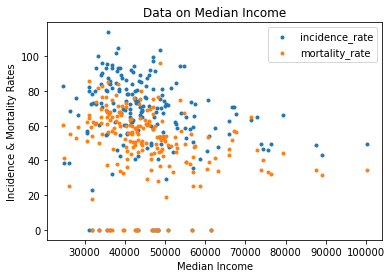

In [347]:
#scatter plots
plt.scatter(mergDat['Med_Income'][::15],mergDat['Incidence_Rate'][::15],label="incidence_rate",marker='.')
plt.scatter(mergDat['Med_Income'][::15],mergDat['Mortality_Rate'][::15],label="mortality_rate",marker='.')
plt.title("Data on Median Income")
plt.xlabel("Median Income")
plt.ylabel("Incidence & Mortality Rates")
plt.legend()
plt.show()

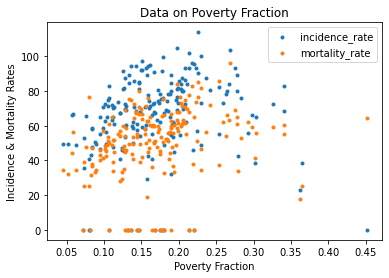

In [348]:
plt.scatter(mergDat['Pov_Frac'][::15],mergDat['Incidence_Rate'][::15],label="incidence_rate",marker='.')
plt.scatter(mergDat['Pov_Frac'][::15],mergDat['Mortality_Rate'][::15],label="mortality_rate",marker='.')
plt.title("Data on Poverty Fraction")
plt.xlabel("Poverty Fraction")
plt.ylabel("Incidence & Mortality Rates")
plt.legend()
plt.show()

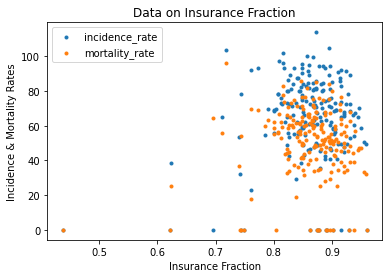

In [350]:
plt.scatter(mergDat['Insurance_Frac'][::15],mergDat['Incidence_Rate'][::15],label="incidence_rate",marker='.')
plt.scatter(mergDat['Insurance_Frac'][::15],mergDat['Mortality_Rate'][::15],label="mortality_rate",marker='.')
plt.title("Data on Insurance Fraction")
plt.xlabel("Insurance Fraction")
plt.ylabel("Incidence & Mortality Rates")
plt.legend()
plt.show()

In [351]:
X = mergDat[['Med_Income', 'Pov_Frac']]             #input variables
Y = mergDat[['Incidence_Rate','Mortality_Rate']]    #output vairables

In [352]:
#multivariate regressions
regr = LinearRegression()
regr.fit(X, Y)
#getting coefficients from multivariate regressions
coeff=regr.coef_
print(regr.coef_)

[[-2.86928198e-04  5.69233135e+01]
 [-2.39432243e-04  5.53395638e+01]]


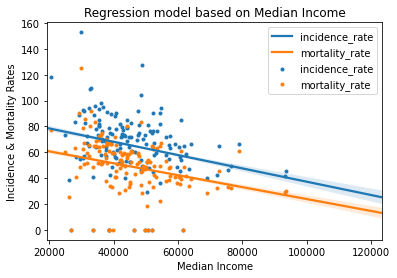

In [353]:
sns.regplot(x=mergDat['Med_Income'],y=mergDat['Incidence_Rate'],scatter=False,label="incidence_rate")
sns.regplot(x=mergDat['Med_Income'],y=mergDat['Mortality_Rate'],scatter=False,label="mortality_rate")

plt.scatter(mergDat['Med_Income'][::20],mergDat['Incidence_Rate'][::20],label="incidence_rate",marker='.')
plt.scatter(mergDat['Med_Income'][::20],mergDat['Mortality_Rate'][::20],label="mortality_rate",marker='.')
plt.title("Regression model based on Median Income")
plt.xlabel("Median Income")
plt.ylabel("Incidence & Mortality Rates")
plt.legend()
plt.show()

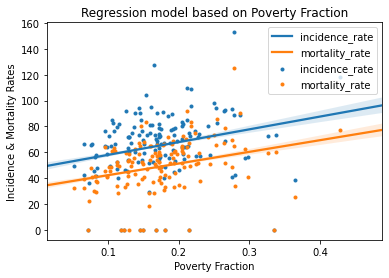

In [354]:
sns.regplot(x=mergDat['Pov_Frac'],y=mergDat['Incidence_Rate'],scatter=False,label="incidence_rate")
sns.regplot(x=mergDat['Pov_Frac'],y=mergDat['Mortality_Rate'],scatter=False,label="mortality_rate")

plt.scatter(mergDat['Pov_Frac'][::20],mergDat['Incidence_Rate'][::20],label="incidence_rate",marker='.')
plt.scatter(mergDat['Pov_Frac'][::20],mergDat['Mortality_Rate'][::20],label="mortality_rate",marker='.')
plt.title("Regression model based on Poverty Fraction")
plt.xlabel("Poverty Fraction")
plt.ylabel("Incidence & Mortality Rates")
plt.legend()
plt.show()
